# A new Food Warehouse in Leuven (Business Recommendation)

<img src = "https://www.mvovlaanderen.be/sites/default/files/styles/mvo_big/public/media/Leuven-by-night.jpeg?itok=j5q5yl8Z" width = *00> </a>

#########################################################################################################
## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

  ##1-PROBLEM DESCRIPTION##
    
 <a href="#item1"> Problem Description</a>

  ##2-DATA DESCRIPTION AND GATHERING##
    
 <a href="#item1"> Data We Need</a>
    
 <a href="#item2"> Gathering Neighborhoods and Postal Codes </a>

 <a href="#item3">Gathering Locations Data</a>

 <a href="#item4">Gathering Foursquare Data</a>

  ##3-DATA EXPLORATION AND DESCRIPTIVE ANALYSIS##
    
 <a href="#item5">Explore Data Set/ Neighborhoods in Leuven</a>

 <a href="#item6">Analyse Each Neighborhood</a>  

   ##4-ML CLUSTERING -KMEANS##
    
 <a href="#item6">Machine Learning/ Cluster Neighborhoods</a>

 <a href="#item7">Examine Clusters</a>  
    
   ##5-CONCLUSION##
    
 <a href="#item8">Recommend Analytic Results</a>  
    
</font>
</div>
################################################################################################################

### 1-PROBLEM DESCRIPTION
    
 <a href="#item1"> Problem Description</a>
 #############################################################################################################
 An investor in food sector would like to build up a new supermarket/food warehouse in Leuven (Belgium). The investor would like to deliver fresh and high-quality food products (groceries) to places as Restaurants, Fast Food Stores, Bakeries, Breakfast Venues, Breweries and Cafés. The investor aims to build a food warehouse for the groceries and products bought from local villagers and farmers, in this sense he also would like to get local acceptance and support of people that will also provide more and satisfied customers. Customer satisfaction and Service quality is always main stones in the philosophy of the company.

  In order to get a prestigious name in the sector and more profit in terms of money and time, he targets with quick and effective response to the customers; so the location of the food warehouse in an optimum place has utmost importance that will provide easy and timely delivery of products from local farmers and deliver to the related customers (venues) in the city.

  The investor would also like to minimize transportation cost by building the warehouse in a close and optimized location to its customers. There are several (5) neighborhoods (Leuven Center, Heverlee, Kessel-Lo, Wilsele and Wijgmaal) in city Leuven that our investor set the focus on. Determining the right neighborhood is our goal and we will use Machine Learning algorithm to cluster the neighborhoods and make a recommendation to the investor as a solution to this problem. 
 ##############################################################################################################

### 2-DATA DESCRIPTION AND GATHERING##
    
 <a href="#item1"> Data We Need</a>
 
################################################################################################################
    
  We will need geo-locational information about that specific borough (Leuven city) and the neighborhoods in that city. We specifically and technically mean the latitude and longitude numbers of Leuven. The investor would like to make the investment of food warehouse in Leuven but which neighborhood is not decided. The Postal Codes of Leuven  (3000,3001,3010,3012,3018) that provides us necessary information to find which neighborhoods (3000 Leuven Center(Old City), 3001 Heverlee, 3010 Kessel-Lo, 3012 Wilsele and 3018 Wijgmaal) are our candidates for the location of warehouse. In this sense, we will get the data including postal codes and names of neighborhoods in Leuven. Then we can get location information of these 5 neighborhoods to use in the further step. As an example we will have finally for each neighborhood:
   
   #### PostalCode/	Borough/	 Neighborhood/	Latitude/	Longitude/
   
   #### 3001/	   Leuven/  	 Heverlee/  	50.851729/	4.693131/

   In the second part of our solution we will need data about different venues in the different neighborhoods of city Leuven. "Foursquare" application will provide us  the locational information of the venues that we needed. By locational information of center of each neighborhood and by inputting a self-determined distance from this center we can get detailed information about the venues stand inside the circular interest area we have described. For each venue, we can gather information including its specific location info (latitude, longitude), category and popularity of the venue. 

   After gathering and merging necessary information we will do clustering to see the similarities and differences of the neighborhoods. Then we will count and sum the number of food product customers per neighborhood to decide which neighborhood is potentially a better choice for investment.  
   
   Foursquare will provide us data  such as the following information:

#### Neighborhood/	Neighborhood Latitude/	Neighborhood Longitude/	Venue/	Venue Latitude/	Venue Longitude/	Venue Distance/	Venue Summary/	Venue Category/
#### Wijgmaal	50.926428/	4.700121/	Halte Waterstraat/	50.922755/	4.691789/	713/	This spot is popular/	Bus Stop/
   
################################################################################################################

<a href="#item1"> Gathering Neighborhoods and Postal code Data </a>
#################################################################################################################
#### Import necessary libraries for the project
Before we get the data and start exploring it, let's download all the dependencies that we will need.
In this project especially we will use necessary Libraries such as BeautifulSoup and requests for Web Scraping.

In [4]:
# importing libraries
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
from bs4 import BeautifulSoup
import requests # library to handle requests
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# !conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
import geopy.geocoders # convert an address into latitude and longitude values


#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# !conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library


# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries are imported.')

Libraries are imported.


####  Webscrape the Data from web page into Dataframe 
I have three different methods two scrape the data as shown below.We can use one of the following methods to get the necessary html file and data from the Vlaanderen.be page.

    a. Pandas method 
    b. BeautifulSoup method


In [9]:
# Pandas method: to get the postal code and neighborhood data

url="https://www.vlaanderen.be/gemeenten-en-provincies/provincie-vlaams-brabant/leuven"
LeuvenSource = requests.get(url).text

tables = pd.read_html(LeuvenSource)
# result of first method 
df=pd.DataFrame(tables[0])
df
#LeuvenSource

,0,1
0,Postcode(s),"3000, 3001, 3010, 3012, 3018"
1,Deelgemeenten,"Leuven, Heverlee, Kessel-Lo, Wilsele, Wijgmaal"


In [10]:
# split the neighborhoods and post codes into fields
df = pd.DataFrame(df, columns=[1])
df= df[1].apply(lambda x : pd.Series(x.split(','))).head()
df

,0,1,2,3,4
0,3000,3001,3010,3012,3018
1,Leuven,Heverlee,Kessel-Lo,Wilsele,Wijgmaal


In [11]:
#pre-processing the data frame
neighborhoods=df.transpose()
neighborhoods[2]=neighborhoods[1]
#we know that borough is Leuven city so we set it into the table
neighborhoods[1]=['Leuven','Leuven','Leuven','Leuven','Leuven']
neighborhoods.columns = ['PostalCode','Borough', 'Neighborhood'] 

In [12]:
neighborhoods

,PostalCode,Borough,Neighborhood
0,3000,Leuven,Leuven
1,3001,Leuven,Heverlee
2,3010,Leuven,Kessel-Lo
3,3012,Leuven,Wilsele
4,3018,Leuven,Wijgmaal


In [13]:
# b. BeautifulSoup method: to get data from the HTML file 

# We can downlad the web page as html file and then convert to file into lxml file for parsing. 
# We can do this step by using !wget method or requests library (get method) then use BeautifulSoup capabilities.
# We can also get the html info in two alternatives also.Then scraped data into lxml file with Beautifulsoup

#to get the HTML file !wget method

!wget -q -O 'Leuvenpost.html' https://www.vlaanderen.be/gemeenten-en-provincies/provincie-vlaams-brabant/leuven
print('Data downloaded!')
with open('Leuvenpost.html') as can_html_file:
    soup=BeautifulSoup(can_html_file,'lxml')
    
#to get the HTML file second request method

LeuvenSource2= requests.get("https://www.vlaanderen.be/gemeenten-en-provincies/provincie-vlaams-brabant/leuven").text
soup=BeautifulSoup(LeuvenSource2,'lxml')
#soup

Data downloaded!


Now, with the following code we scrape the table data in the html file into tableLeuven element by using BeautifulSoup. In the following steps we will turn this information into pandas data frame. You can prettify the information and examine to see the hierarchy in the data.

In [14]:
tableLeuven=soup.find('table')
print(tableLeuven.prettify())

<table class="data-table data-table--no-header">
 <tbody>
  <tr>
   <td class="data-table__body-title">
    Postcode(s)
   </td>
   <td>
    3000, 3001, 3010, 3012, 3018
   </td>
  </tr>
  <tr>
   <td class="data-table__body-title">
    Deelgemeenten
   </td>
   <td>
    Leuven, Heverlee, Kessel-Lo, Wilsele, Wijgmaal
   </td>
  </tr>
 </tbody>
</table>


When we examine the tableLeuven data we will see that the necessary information stays between <td> parts. And each is in order with groups of postalcode, borough and neighborhood following each other. To get the data easier out from html element we will use fin_all method of Beautifulsoup library.

In [15]:
#Table content in a list. the order in three groups is such as postalcode,borough and neighborhood
tableContent=tableLeuven.find_all ('td')
tableContent[0:9]

[<td class="data-table__body-title">Postcode(s)</td>,
 <td>3000, 3001, 3010, 3012, 3018</td>,
 <td class="data-table__body-title">Deelgemeenten</td>,
 <td>Leuven, Heverlee, Kessel-Lo, Wilsele, Wijgmaal</td>]

Now we have a list and with the following codes we can exploer the data inside the list. Then we learn how to get the postcode and neighborhood information. Borough is Leuven City.
Then we get ready to scrape the data into a dataframe. So lets define the columns of our neighborhoods data frame that place the Leuven postal code and neighborhood information.

In [16]:
# define the dataframe columns
column_names = ['PostalCode','Borough', 'Neighborhood'] 

# instantiate the dataframe
neighborhoods2= pd.DataFrame(columns=column_names)
neighborhoods2

,PostalCode,Borough,Neighborhood


In [17]:
#preprocess and split data into proper format

a=tableContent[1].text.split(',')
b=tableContent[3].text.split(',')
neighborhoods2['PostalCode']=a
neighborhoods2['Neighborhood']=b
#we know that borough is Leuven city so we set it into the table
neighborhoods2['Borough']=['Leuven','Leuven','Leuven','Leuven','Leuven']

In [18]:
neighborhoods2

,PostalCode,Borough,Neighborhood
0,3000,Leuven,Leuven
1,3001,Leuven,Heverlee
2,3010,Leuven,Kessel-Lo
3,3012,Leuven,Wilsele
4,3018,Leuven,Wijgmaal


We have the same table as in pandas method. Our dataframe now consists of three columns: PostalCode, Borough, and Neighborhood.We now only process the cells that have an assigned borough. 
We will save the dataframe into csv file.


In [19]:
#save the data into csv file
LeuvenDF=neighborhoods
LeuvenDF.to_csv('LeuvenDFpart1.csv', encoding='utf-8', index=False)

In [20]:
import json
LeuvenDF.to_json('LeuvenDFpart1.json')

##############################################################################################################


 <a href="#item2">Gathering Locations Data</a>
#################################################################################################################

Now that you have built a dataframe of the postal code of each neighborhood along with the borough name and neighborhood name, in order to utilize the Foursquare location data, we need to get the latitude and the longitude coordinates of each neighborhood.
There are several alternatives

#### Google Maps Geocoding API (not free)
In an older version of this course, we were leveraging the Google Maps Geocoding API to get the latitude and the longitude coordinates of each neighborhood. However, recently Google started charging for their API: http://geoawesomeness.com/developers-up-in-arms-over-google-maps-api-insane-price-hike/.

#### Geocoder Python package 
 
 we can use the link : https://geocoder.readthedocs.io/index.html.
The problem with this Package is you have to be persistent sometimes in order to get the geographical coordinates of a given postal code. So you can make a call to get the latitude and longitude coordinates of a given postal code and the result would be None, and then make the call again and you would get the coordinates. So, in order to make sure that you get the coordinates for all of our neighborhoods, you can run a while loop for each postal code. Taking postal code M5G as an example, your code would look something like this:

#### csv file download

Given that Geocodor package can be very unreliable, in case you are not able to get the geographical coordinates of the neighborhoods using the Geocoder package, here is a link to a json and a csv file that has the geographical coordinates of each postal code: 
https://github.com/jief/zipcode-belgium/blob/master/zipcode-belgium.json

https://github.com/jief/zipcode-belgium/blob/master/zipcode-belgium.csv

We will Use the Geocoder package or the csv file to create the following dataframe:

In [47]:
#Geocodor Python package
!pip install geocoder
import geocoder # import geocoder

    100% |████████████████████████████████| 102kB 18.4MB/s 


#### geocodor method to get location data

In [ ]:
# Geocodor method: to get the locations first method

# firstly define the postal code
postalcode=LeuvenDF["PostalCode"]

latitude = []
longitude = []
for elem in postalcode:
# initialize your variable to None
    lat_lng_coords = None

# loop until you get the coordinates
    while (lat_lng_coords is None):
        g = geocoder.google('{}, Leuven, Belgium'.format(elem))
        lat_lng_coords = g.latlng
        # print(lat_lng_coords)

    latitude.append(lat_lng_coords[0])
    longitude.append(lat_lng_coords[1])
    print(elem, 'is RECEIVED.')
    # print(lat_lng_coords[0])
    # print(lat_lng_coords[1])
    

In [20]:
#add the locations to Leuven DF1
LeuvenDF1= LeuvenDF
LeuvenDF1[['Latitude']]=latitude
LeuvenDF1[['Longtitude']]=longtitude
LeuvenDF1

,PostalCode,Borough,Neighborhood
0,3000,Leuven,Leuven
1,3001,Leuven,Heverlee
2,3010,Leuven,Kessel-Lo
3,3012,Leuven,Wilsele
4,3018,Leuven,Wijgmaal


 #### Since geocodor method may take long time download from other web sources ready data

In [21]:
#download the data instead from a web page we have founded
# Here is a source of all zip codes and location infos
BelgiumLocationData = pd.read_csv("https://raw.githubusercontent.com/jief/zipcode-belgium/master/zipcode-belgium.csv",header=None)
BelgiumLocationData.head()

,0,1,2,3
0,1000,Bruxelles,4.351697,50.846557
1,1020,Laeken,4.348713,50.883392
2,1030,Schaerbeek,4.373712,50.867604
3,1040,Etterbeek,4.389510,50.836851
4,1050,Ixelles,4.381571,50.822285


In [22]:
#save it to a csv file
BelgiumLocationData.to_csv('BelgiumLocationData.csv', encoding='utf-8', index=False)
BelgiumLocationData.columns = ['PostalCode','Neighborhood','Longitude','Latitude'] 
BelgiumLocationData.shape

(2757, 4)

In [23]:
#to find the realted rows starting with Leuven area postal codes use the following codes
BelgiumLocationData.loc[BelgiumLocationData['Neighborhood']=='Leuven']

,PostalCode,Neighborhood,Longitude,Latitude
405,3000,Leuven,4.69299,50.881253


In [24]:
BelgiumLocationData.loc[BelgiumLocationData['Neighborhood']=='Wijgmaal']

,PostalCode,Neighborhood,Longitude,Latitude
409,3018,Wijgmaal,4.700121,50.926428


In [25]:
# set the regarding rows into another dataframe for leuven neighborhoods (the rows between 405 and 410)
LeuvenLocationDF=BelgiumLocationData[405:410].reset_index()
LeuvenLocationDF

,index,PostalCode,Neighborhood,Longitude,Latitude
0,405,3000,Leuven,4.692990,50.881253
1,406,3001,Heverlee,4.693131,50.851729
2,407,3010,Kessel Lo,4.730761,50.889915
3,408,3012,Wilsele,4.713629,50.909536
4,409,3018,Wijgmaal,4.700121,50.926428


In [26]:
# add the longtitude adn latitude columns to our LeuvenDF 
LeuvenDF[['Latitude','Longitude']]=LeuvenLocationDF[['Latitude','Longitude']]
LeuvenDF.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,3000,Leuven,Leuven,50.881253,4.692990
1,3001,Leuven,Heverlee,50.851729,4.693131
2,3010,Leuven,Kessel-Lo,50.889915,4.730761
3,3012,Leuven,Wilsele,50.909536,4.713629
4,3018,Leuven,Wijgmaal,50.926428,4.700121


In [26]:
#we have the same data from both methods (geolocator/web file download)
LeuvenDF1==LeuvenDF

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,True,True,True,True,True
1,True,True,True,True,True
2,True,True,True,True,True
3,True,True,True,True,True
4,True,True,True,True,True


In [27]:
#save the new DF with location info into csv file
LeuvenDF.to_csv('LeuvenDFpart2.csv', encoding='utf-8', index=False)
LeuvenDF

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,3000,Leuven,Leuven,50.881253,4.692990
1,3001,Leuven,Heverlee,50.851729,4.693131
2,3010,Leuven,Kessel-Lo,50.889915,4.730761
3,3012,Leuven,Wilsele,50.909536,4.713629
4,3018,Leuven,Wijgmaal,50.926428,4.700121


In [55]:
LeuvenDF.to_json('LeuvenDFpart2.json')

In [28]:
#to see howmany unique neighborhoods in Leuven
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(LeuvenDF['Borough'].unique()),
        LeuvenDF.shape[0]
    )
)

The dataframe has 1 boroughs and 5 neighborhoods.



 <a href="#item3">Gathering Foursquare Data</a>

Leuven has 5 unique postal codes. 
We will continue data gathering here in order to later explore, analysis and cluster the neighborhoods in Leuven. We will  work with Neighborhoods  Leuven (City Center); Heverlee,Kessel-Lo, Wilsele, Wijgmaal. In order to segment the neighborhoods and explore them, we will essentially need a dataset that contains also the latitude and logitude coordinates of each neighborhood. With that information we will get the venues data from Foursquare.

We can in this phase use the location information of neighborhoods that we have already have in Leuven Data frame. We will use this info for getting data from Foursquare. 

We can also use  geopy library to get the location values of Leuven. In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent <em>leuven_explorer</em>, as shown below.

In [29]:
#we can get the location data of Leuven from already prepared LeuvenDF

latitude= float(LeuvenDF[0:1]['Latitude'])
longitude= float(LeuvenDF[0:1]['Longitude'])

#alternative method is using Nominatim and geolocator
address = '3000 Leuven'

geolocator = Nominatim(user_agent="leuven_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Leuven City are {}, {}.'.format(latitude, longitude))


The geograpical coordinates of Leuven City are 50.879202, 4.7011675.


#### Create a map of Leuven with neighborhoods superimposed on top.
In this step, we would like to step the map of Leuven to get an overall idea how can we get venues data from Fourqsuare by later determining the radius length around the center points of neighborhoods. 

In [30]:

# create map of Leuven using latitude and longitude values
map_leuven = folium.Map(location=[latitude, longitude], zoom_start=12)
neighborhoods=LeuvenDF
# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_leuven)  
    
map_leuven

Next, we are going to start utilizing the Foursquare API to get the venue information of  the neighborhoods and segment them.

#### Define Foursquare Credentials and Version

In [31]:
CLIENT_ID = 'IAYTHJO0R2Y5KEZEJX1QLME20C5CBB5TPA5NHSWT1COADQA3' # your Foursquare ID
CLIENT_SECRET = '5EYRUPZTYZE5A0R2X04KQIFISBCGLCMV3TYRU4I00MHYRKPK' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: IAYTHJO0R2Y5KEZEJX1QLME20C5CBB5TPA5NHSWT1COADQA3
CLIENT_SECRET:5EYRUPZTYZE5A0R2X04KQIFISBCGLCMV3TYRU4I00MHYRKPK


#### Lets get venues data of Neighborhoods in Leuven (5 neighborhoods). 
We first define a function as follows

In [32]:
def getNearbyVenues(names, latitudes, longitudes, radius=1500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng,      
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['location']['distance'],
            v['reasons']['items'][0]['summary'],
            v['venue']['categories'][0]['name']) for v in results])
        
   
        
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude',
                  'Venue Distance',
                   'Venue Summary',
                  'Venue Category']
    return(nearby_venues)

In [33]:
#### Now lets write the code to run the above function on each neighborhood and create a new dataframe called *leuven_venues*.
# Leuven-Venues
# To get 150 venues that are in the 1500 radius of neighborhoods
radius=1500
LIMIT=150
leuven_venues = getNearbyVenues(names=LeuvenDF['Neighborhood'],
                                   latitudes=LeuvenDF['Latitude'],
                                   longitudes=LeuvenDF['Longitude']
                                  )
# the names of 5 Neighborhoods in these 1 boroughs are written inside the function 

Leuven
 Heverlee
 Kessel-Lo
 Wilsele
 Wijgmaal


In [34]:
# Let's check the size of the resulting dataframe
print(leuven_venues.shape)
leuven_venues.tail()

(294, 9)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Distance,Venue Summary,Venue Category
289,Wijgmaal,50.926428,4.700121,Sportlokaal,50.924938,4.686548,966,This spot is popular,Bar
290,Wijgmaal,50.926428,4.700121,Lijnloperspad,50.917226,4.706344,1113,This spot is popular,Bike Trail
291,Wijgmaal,50.926428,4.700121,Apotheek Haegemans,50.917074,4.685834,1445,This spot is popular,Pharmacy
292,Wijgmaal,50.926428,4.700121,Apotheek Adriaens,50.922932,4.720527,1483,This spot is popular,Pharmacy
293,Wijgmaal,50.926428,4.700121,Nachtwinkel Euro,50.924335,4.721062,1487,This spot is popular,Convenience Store


In [35]:
leuven_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Distance,Venue Summary,Venue Category
0,Leuven,50.881253,4.69299,Bar Berlin,50.880699,4.692575,68,This spot is popular,Coffee Shop
1,Leuven,50.881253,4.69299,Dijleterrassen,50.881423,4.696980,280,This spot is popular,Plaza
2,Leuven,50.881253,4.69299,El Sombrero,50.881635,4.696864,275,This spot is popular,Mexican Restaurant
3,Leuven,50.881253,4.69299,De Frittoerist,50.879483,4.690391,268,This spot is popular,Friterie
4,Leuven,50.881253,4.69299,Kruidtuin,50.878124,4.690770,381,This spot is popular,Botanical Garden


In [36]:
## End of Processing the Retrieved Information from Foursquare
## Saving a Cleaned Version of DataFrame as the Results from Foursquare 
leuven_venues.to_csv('leuven_venues.csv')
leuven_venues = pd.read_csv('leuven_venues.csv')
leuven_venues.to_json('leuven_venues.json')

### 3-DATA EXPLORATION AND DESCRIPTIVE ANALYSIS 

 <a href="#item5">Explore and Analyse Data Set/ Neighborhoods in Leuven</a>
 
#################################################################################################################
I will in this part give some summary information over the neighborhoods that we gathered, try to explore and later to analyze data to get insight for the solution of our business problem. Since we would like to build a new food warehouse then the number of venues and especially food consuming or selling venues in each neighborhood and their total numbers will be valuable. 

In [37]:
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing

In [38]:
#Data Exploration#1
#Let's check how many venues were returned for each neighborhood
leuven_venues.groupby('Neighborhood').count()

,Unnamed: 0,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Distance,Venue Summary,Venue Category
Neighborhood,,,,,,,,,
Heverlee,47,47,47,47,47,47,47,47,47
Kessel-Lo,84,84,84,84,84,84,84,84,84
Wijgmaal,27,27,27,27,27,27,27,27,27
Wilsele,36,36,36,36,36,36,36,36,36
Leuven,100,100,100,100,100,100,100,100,100


In [39]:
#Leuven location
latitude=50.881253
longitude=4.69299

In [40]:
# Lets plot our venues on the map to see an overall distribution of the venues
venues_map = folium.Map(location=[latitude, longitude], zoom_start=11) # generate map centred around Ecco


# add Ecco as a red circle mark
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    popup='Ecco',
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(venues_map)


# add popular spots to the map as blue circle markers
for lat, lng, label in zip(leuven_venues ['Venue Latitude'], leuven_venues['Venue Longitude'], leuven_venues['Neighborhood']):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(venues_map)

# display map
venues_map

The other proper remedy is to group the venues into different clusters. Each cluster is then represented by the number of venues in each neighborhood. These clusters can be thought of as pockets of Leuven which you can then analyze separately. 

To implement this, we start off by instantiating a *MarkerCluster* object and adding all the data points in the dataframe to this object.

In [41]:
#cluster marker
from folium import plugins

# let's start again with a clean copy of the map of Leuven
leuven_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
venues = plugins.MarkerCluster().add_to(leuven_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(leuven_venues ['Venue Latitude'], leuven_venues['Venue Longitude'], leuven_venues['Venue Category']):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(venues)

# display map
leuven_map

This is an interactive map. Notice how when you zoom out all the way, all markers are grouped into one cluster, *the global cluster*, of 100 markers or crimes, which is the total number of crimes in our dataframe. Once you start zooming in, the *global cluster* will start breaking up into smaller clusters. Zooming in all the way will result in individual markers.
Here we can see where the venues are located and geographically grouped. 
As a simple inside out we can see that the old city center is the most popular place by 100 venues.

In [ ]:
##chroroptpleth maps HERE

In [ ]:
# download countries geojson file
!wget --quiet https://ibm.box.com/shared/static/cto2qv7nx6yq19logfcissyy4euo8lho.json -O world_countries.json
    
print('GeoJSON file downloaded!')

In [2]:
!wget --quiet https://services1.arcgis.com/XLY7M6F9oPzjvKmJ/arcgis/rest/services/Leuven_Deelgemeenten/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson -O leuven_neighs.json
    
print('GeoJSON file downloaded!')


/bin/sh: 1: -O: not found
GeoJSON file downloaded!


Neighborhood
 Heverlee     [[AxesSubplot(0.125,0.125;0.775x0.755)]]
 Kessel-Lo    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
 Wijgmaal     [[AxesSubplot(0.125,0.125;0.775x0.755)]]
 Wilsele      [[AxesSubplot(0.125,0.125;0.775x0.755)]]
Leuven        [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

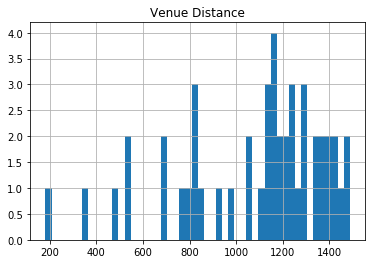

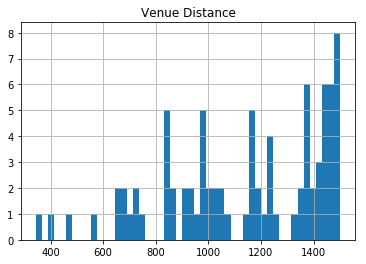

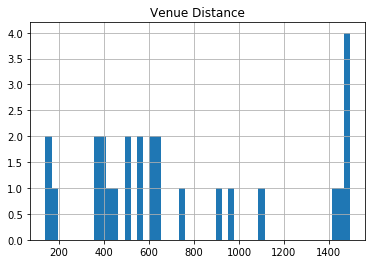

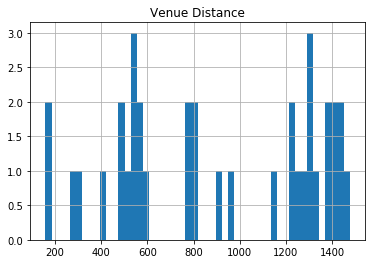

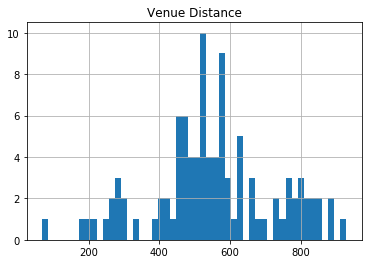

In [42]:
# plot the venues in the neighborhoods
#leuven_venues['Neighborhood'].unique()
leuven_venues.groupby('Neighborhood').hist(column='Venue Distance', bins=50)

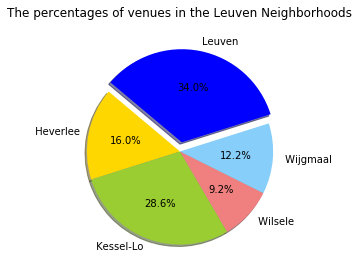

In [43]:
import matplotlib.pyplot as plt
#pie chart showing the distribution of general venues in each neighbourhoods
sizes=leuven_venues.groupby('Neighborhood').count()
sizes=sizes[['Venue Distance']].values

# Data to plot
labelsH= ' Heverlee', ' Kessel-Lo', ' Wilsele', ' Wijgmaal','Leuven'
sizes=sizes
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','blue']
explode = (0, 0, 0, 0,0.1)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labelsH, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('The percentages of venues in the Leuven Neighborhoods\n') 
plt.axis('equal')
plt.show()

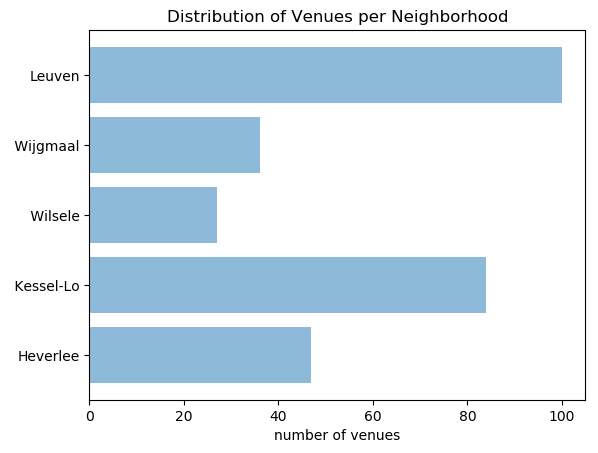

In [44]:
#plot barchart to see the venues per neighborhood

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
neighs = ('Heverlee', ' Kessel-Lo', ' Wilsele', ' Wijgmaal','Leuven')
y_pos = np.arange(len(neighs))

nrVenues=leuven_venues.groupby('Neighborhood').count()
nrVenues=nrVenues['Venue'].values

plt.barh(y_pos, nrVenues, align='center', alpha=0.5)
plt.yticks(y_pos, neighs)
plt.xlabel('number of venues')
plt.title('Distribution of Venues per Neighborhood')
 
plt.show()

In [46]:
neighs = ('Heverlee', ' Kessel-Lo', ' Wilsele', ' Wijgmaal','Leuven')
y_pos = np.arange(len(neighs))
y_pos

array([0, 1, 2, 3, 4])

In [47]:
nrVenues=leuven_venues.groupby('Neighborhood').count()
nrVenues=nrVenues['Venue'].values
nrVenues

array([ 47,  84,  27,  36, 100])

In [48]:
# the following statistics can provide some insight over the area that the venues spread from the center
leuven_venues.describe()['Venue Distance']

count     294.000000
mean      863.448980
std       394.473723
min        68.000000
25%       531.000000
50%       805.000000
75%      1230.500000
max      1501.000000
Name: Venue Distance, dtype: float64

In [49]:
#average distances of the venues to the neighborhoud centers
leuven_venues.groupby('Neighborhood')['Venue Distance'].mean() 

Neighborhood
 Heverlee     1077.148936
 Kessel-Lo    1137.619048
 Wijgmaal      743.259259
 Wilsele       902.444444
Leuven         551.120000
Name: Venue Distance, dtype: float64

In [50]:
#### Let's find out how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(leuven_venues['Venue Category'].unique())))

There are 110 uniques categories.


In [51]:
print('Here is the list of different categories:')
a=list(leuven_venues['Venue Category'].unique())
a

Here is the list of different categories:


['Coffee Shop',
 'Plaza',
 'Mexican Restaurant',
 'Friterie',
 'Botanical Garden',
 'Bakery',
 'Hotel',
 'Pizza Place',
 'Cheese Shop',
 'Italian Restaurant',
 'Wine Bar',
 'Indian Restaurant',
 'Electronics Store',
 'Bar',
 'Gift Shop',
 'Thai Restaurant',
 'Burrito Place',
 'Clothing Store',
 'Park',
 'Gym / Fitness Center',
 'Cocktail Bar',
 'Sporting Goods Shop',
 'Bistro',
 'Restaurant',
 'Frozen Yogurt Shop',
 'Ice Cream Shop',
 'Pastry Shop',
 'Board Shop',
 'Flower Shop',
 'Burger Joint',
 'Toy / Game Store',
 'Dessert Shop',
 'Vegetarian / Vegan Restaurant',
 'French Restaurant',
 'Brasserie',
 'Beer Bar',
 'Boutique',
 'Sushi Restaurant',
 'Spa',
 'Poke Place',
 'Soup Place',
 'Sandwich Place',
 'Tapas Restaurant',
 'Gourmet Shop',
 'Tea Room',
 'Organic Grocery',
 'Chocolate Shop',
 'Gastropub',
 'Chinese Restaurant',
 'Pie Shop',
 'Noodle House',
 'BBQ Joint',
 'Forest',
 'Greek Restaurant',
 'Steakhouse',
 'Supermarket',
 'Castle',
 'Belgian Restaurant',
 'Skating Rink',
 

In [52]:
# Just for fun and deeper understanding
print(type(leuven_venues[['Venue Category']]))

print(type(leuven_venues['Venue Category']))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


 <a href="#item6">Analyse Each Neighborhood</a>  
 
 ##############################################################################################################
 #graph showing the number of each venues in each neighborhoud???
#other descriptive values
#number of restaurants etc
#correlation etc
#describe 

### One-hot Encoding the "categories" Column into Every Unique Categorical Feature.

In [53]:

# one hot encoding
leuven_onehot = pd.get_dummies(leuven_venues[['Venue Category']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
leuven_onehot['Neighborhood'] = leuven_venues['Neighborhood'] 
leuven_onehot.head()


,Athletics & Sports,BBQ Joint,Bakery,Bar,Basketball Court,Beer Bar,Belgian Restaurant,Bike Trail,Bistro,Board Shop,Boarding House,Botanical Garden,Boutique,Bowling Alley,Brasserie,Brewery,Burger Joint,Burrito Place,Bus Station,Bus Stop,Café,Castle,Cheese Shop,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Cafeteria,Concert Hall,Construction & Landscaping,Convenience Store,Dessert Shop,Discount Store,Doner Restaurant,Electronics Store,Event Space,Farmers Market,Fast Food Restaurant,Fish Market,Flower Shop,Food Court,Forest,French Restaurant,Friterie,Frozen Yogurt Shop,Fruit & Vegetable Store,Garden Center,Gastropub,Gay Bar,Gift Shop,Gourmet Shop,Greek Restaurant,Gym,Gym / Fitness Center,Hockey Field,Hostel,Hotel,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Kebab Restaurant,Liquor Store,Market,Mexican Restaurant,Middle Eastern Restaurant,Noodle House,Optical Shop,Organic Grocery,Outdoor Gym,Outdoors & Recreation,Park,Pastry Shop,Pet Store,Pharmacy,Pie Shop,Pizza Place,Platform,Playground,Plaza,Poke Place,Pool,Pool Hall,Restaurant,Sandwich Place,Scenic Lookout,Skating Rink,Soccer Field,Social Club,Soup Place,Spa,Sporting Goods Shop,Sports Bar,Sports Club,State / Provincial Park,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Wine Bar,Neighborhood
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Leuven
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Leuven
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Leuven
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Leuven
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Leuven


## Food Warehouse Related Venue Categories
This information is important to determine the potentially most profitable neighborhood for delivery and sales

In [54]:
# The potential food products buyers and consumers are chosen from the unique lists of venues

food_consumer_venues_list = [
 
 'Neighborhood',
 'Coffee Shop',
 'Mexican Restaurant',
 'Friterie',
 'Bakery',
 'Hotel',
 'Pizza Place',
 'Cheese Shop',
 'Italian Restaurant',
 'Wine Bar',
 'Indian Restaurant',
 'Thai Restaurant',
 'Bar',
 'Burrito Place',
 'Cocktail Bar',
 'Bistro',
 'Restaurant',
 'Frozen Yogurt Shop',
 'Ice Cream Shop',
 'Burger Joint',
 'Dessert Shop',
 'Vegetarian / Vegan Restaurant',
 'French Restaurant',
 'Brasserie',
 'Beer Bar',
 'Sushi Restaurant',
 'Poke Place',
 'Soup Place',
 'Sandwich Place',
 'Tapas Restaurant',
 'Gourmet Shop',
 'Tea Room',
 'Organic Grocery',
 'Chocolate Shop',
 'Chinese Restaurant',
 'Gastropub',
 'Noodle House',
 'Pie Shop',
 'BBQ Joint',
 'Greek Restaurant',
 'Steakhouse',
 'Supermarket',
 'Belgian Restaurant',
 'College Cafeteria',
 'Farmers Market',
 'Fast Food Restaurant',
 'Food Court',
 'Brewery',
 'Middle Eastern Restaurant',
 'Sports Bar',
 'Kebab Restaurant',
 'Café',
 'Market',
 'Doner Restaurant',
 'Convenience Store',
 'Liquor Store',
 'Club House',
 'Fruit & Vegetable Store',
]

In [55]:
leuven_onehot.head()
#leuven_onehot.shape

,Athletics & Sports,BBQ Joint,Bakery,Bar,Basketball Court,Beer Bar,Belgian Restaurant,Bike Trail,Bistro,Board Shop,Boarding House,Botanical Garden,Boutique,Bowling Alley,Brasserie,Brewery,Burger Joint,Burrito Place,Bus Station,Bus Stop,Café,Castle,Cheese Shop,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Cafeteria,Concert Hall,Construction & Landscaping,Convenience Store,Dessert Shop,Discount Store,Doner Restaurant,Electronics Store,Event Space,Farmers Market,Fast Food Restaurant,Fish Market,Flower Shop,Food Court,Forest,French Restaurant,Friterie,Frozen Yogurt Shop,Fruit & Vegetable Store,Garden Center,Gastropub,Gay Bar,Gift Shop,Gourmet Shop,Greek Restaurant,Gym,Gym / Fitness Center,Hockey Field,Hostel,Hotel,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Kebab Restaurant,Liquor Store,Market,Mexican Restaurant,Middle Eastern Restaurant,Noodle House,Optical Shop,Organic Grocery,Outdoor Gym,Outdoors & Recreation,Park,Pastry Shop,Pet Store,Pharmacy,Pie Shop,Pizza Place,Platform,Playground,Plaza,Poke Place,Pool,Pool Hall,Restaurant,Sandwich Place,Scenic Lookout,Skating Rink,Soccer Field,Social Club,Soup Place,Spa,Sporting Goods Shop,Sports Bar,Sports Club,State / Provincial Park,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Wine Bar,Neighborhood
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Leuven
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Leuven
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Leuven
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Leuven
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Leuven


### Updating the One-hot Encoded DataFrame and
### Grouping the Data by Neighborhoods

In [57]:
leuven_grouped = leuven_onehot[food_consumer_venues_list].groupby('Neighborhood').sum()
leuven_grouped.head()

,Coffee Shop,Mexican Restaurant,Friterie,Bakery,Hotel,Pizza Place,Cheese Shop,Italian Restaurant,Wine Bar,Indian Restaurant,Thai Restaurant,Bar,Burrito Place,Cocktail Bar,Bistro,Restaurant,Frozen Yogurt Shop,Ice Cream Shop,Burger Joint,Dessert Shop,Vegetarian / Vegan Restaurant,French Restaurant,Brasserie,Beer Bar,Sushi Restaurant,Poke Place,Soup Place,Sandwich Place,Tapas Restaurant,Gourmet Shop,Tea Room,Organic Grocery,Chocolate Shop,Chinese Restaurant,Gastropub,Noodle House,Pie Shop,BBQ Joint,Greek Restaurant,Steakhouse,Supermarket,Belgian Restaurant,College Cafeteria,Farmers Market,Fast Food Restaurant,Food Court,Brewery,Middle Eastern Restaurant,Sports Bar,Kebab Restaurant,Café,Market,Doner Restaurant,Convenience Store,Liquor Store,Club House,Fruit & Vegetable Store
Neighborhood,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Heverlee,0,0,1,2,1,0,0,1,0,0,1,3,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,2,1,0,0,0,1,1,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
Kessel-Lo,3,0,6,7,4,2,0,2,0,0,1,10,0,0,0,0,0,1,1,0,0,2,2,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,1,2,1,1,1,1,1,1,1,0,0,0
Wijgmaal,0,0,1,1,0,0,0,0,0,0,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
Wilsele,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,1
Leuven,10,2,3,2,1,2,1,7,1,2,1,14,1,3,2,3,1,2,1,1,2,1,1,1,2,1,1,1,1,2,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [58]:
leuven_grouped['Total Food Customers'] = leuven_grouped.sum(axis = 1)
leuven_grouped.to_csv('leuven_grouped_venues.csv')

In [60]:
leuven_grouped

,Coffee Shop,Mexican Restaurant,Friterie,Bakery,Hotel,Pizza Place,Cheese Shop,Italian Restaurant,Wine Bar,Indian Restaurant,Thai Restaurant,Bar,Burrito Place,Cocktail Bar,Bistro,Restaurant,Frozen Yogurt Shop,Ice Cream Shop,Burger Joint,Dessert Shop,Vegetarian / Vegan Restaurant,French Restaurant,Brasserie,Beer Bar,Sushi Restaurant,Poke Place,Soup Place,Sandwich Place,Tapas Restaurant,Gourmet Shop,Tea Room,Organic Grocery,Chocolate Shop,Chinese Restaurant,Gastropub,Noodle House,Pie Shop,BBQ Joint,Greek Restaurant,Steakhouse,Supermarket,Belgian Restaurant,College Cafeteria,Farmers Market,Fast Food Restaurant,Food Court,Brewery,Middle Eastern Restaurant,Sports Bar,Kebab Restaurant,Café,Market,Doner Restaurant,Convenience Store,Liquor Store,Club House,Fruit & Vegetable Store,Total Food Customers
Neighborhood,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Heverlee,0,0,1,2,1,0,0,1,0,0,1,3,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,2,1,0,0,0,1,1,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,24
Kessel-Lo,3,0,6,7,4,2,0,2,0,0,1,10,0,0,0,0,0,1,1,0,0,2,2,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,1,2,1,1,1,1,1,1,1,0,0,0,57
Wijgmaal,0,0,1,1,0,0,0,0,0,0,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,11
Wilsele,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,1,15
Leuven,10,2,3,2,1,2,1,7,1,2,1,14,1,3,2,3,1,2,1,1,2,1,1,1,2,1,1,1,1,2,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81


In [61]:
#the number of total food products customers will be important information for our decison 
foodLeuvenDF=leuven_grouped [0:5]['Total Food Customers']
foodLeuvenDF

Neighborhood
 Heverlee     24
 Kessel-Lo    57
 Wijgmaal     11
 Wilsele      15
Leuven        81
Name: Total Food Customers, dtype: int64

In [62]:
#data frame Total food customers per Neighborhood
df=foodLeuvenDF.reset_index()
df

,Neighborhood,Total Food Customers
0,Heverlee,24
1,Kessel-Lo,57
2,Wijgmaal,11
3,Wilsele,15
4,Leuven,81


Explore the data somemore and Lets see the similarities differences between the neighborhoods

In [63]:
leuven_grouped=leuven_grouped.reset_index()

In [64]:
leuven_grouped

,Neighborhood,Coffee Shop,Mexican Restaurant,Friterie,Bakery,Hotel,Pizza Place,Cheese Shop,Italian Restaurant,Wine Bar,Indian Restaurant,Thai Restaurant,Bar,Burrito Place,Cocktail Bar,Bistro,Restaurant,Frozen Yogurt Shop,Ice Cream Shop,Burger Joint,Dessert Shop,Vegetarian / Vegan Restaurant,French Restaurant,Brasserie,Beer Bar,Sushi Restaurant,Poke Place,Soup Place,Sandwich Place,Tapas Restaurant,Gourmet Shop,Tea Room,Organic Grocery,Chocolate Shop,Chinese Restaurant,Gastropub,Noodle House,Pie Shop,BBQ Joint,Greek Restaurant,Steakhouse,Supermarket,Belgian Restaurant,College Cafeteria,Farmers Market,Fast Food Restaurant,Food Court,Brewery,Middle Eastern Restaurant,Sports Bar,Kebab Restaurant,Café,Market,Doner Restaurant,Convenience Store,Liquor Store,Club House,Fruit & Vegetable Store,Total Food Customers
0,Heverlee,0,0,1,2,1,0,0,1,0,0,1,3,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,2,1,0,0,0,1,1,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,24
1,Kessel-Lo,3,0,6,7,4,2,0,2,0,0,1,10,0,0,0,0,0,1,1,0,0,2,2,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,1,2,1,1,1,1,1,1,1,0,0,0,57
2,Wijgmaal,0,0,1,1,0,0,0,0,0,0,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,11
3,Wilsele,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,1,15
4,Leuven,10,2,3,2,1,2,1,7,1,2,1,14,1,3,2,3,1,2,1,1,2,1,1,1,2,1,1,1,1,2,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81


In [65]:
# we take out Total Food Customer column to see only the most popular venues
leuven_grouped_II=leuven_grouped.drop('Total Food Customers', axis=1)
leuven_grouped_II

,Neighborhood,Coffee Shop,Mexican Restaurant,Friterie,Bakery,Hotel,Pizza Place,Cheese Shop,Italian Restaurant,Wine Bar,Indian Restaurant,Thai Restaurant,Bar,Burrito Place,Cocktail Bar,Bistro,Restaurant,Frozen Yogurt Shop,Ice Cream Shop,Burger Joint,Dessert Shop,Vegetarian / Vegan Restaurant,French Restaurant,Brasserie,Beer Bar,Sushi Restaurant,Poke Place,Soup Place,Sandwich Place,Tapas Restaurant,Gourmet Shop,Tea Room,Organic Grocery,Chocolate Shop,Chinese Restaurant,Gastropub,Noodle House,Pie Shop,BBQ Joint,Greek Restaurant,Steakhouse,Supermarket,Belgian Restaurant,College Cafeteria,Farmers Market,Fast Food Restaurant,Food Court,Brewery,Middle Eastern Restaurant,Sports Bar,Kebab Restaurant,Café,Market,Doner Restaurant,Convenience Store,Liquor Store,Club House,Fruit & Vegetable Store
0,Heverlee,0,0,1,2,1,0,0,1,0,0,1,3,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,2,1,0,0,0,1,1,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,Kessel-Lo,3,0,6,7,4,2,0,2,0,0,1,10,0,0,0,0,0,1,1,0,0,2,2,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,1,2,1,1,1,1,1,1,1,0,0,0
2,Wijgmaal,0,0,1,1,0,0,0,0,0,0,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,Wilsele,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,1
4,Leuven,10,2,3,2,1,2,1,7,1,2,1,14,1,3,2,3,1,2,1,1,2,1,1,1,2,1,1,1,1,2,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [66]:
#### Let's print each neighborhood along with the top 5 most common venues

num_top_venues = 5

for hood in leuven_grouped_II['Neighborhood']:
    print("----"+hood+"----")
    temp = leuven_grouped_II[leuven_grouped_II['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- Heverlee----
                venue  freq
0                 Bar   3.0
1           Brasserie   2.0
2              Bakery   2.0
3  Belgian Restaurant   2.0
4  Chinese Restaurant   2.0


---- Kessel-Lo----
         venue  freq
0          Bar  10.0
1       Bakery   7.0
2     Friterie   6.0
3        Hotel   4.0
4  Coffee Shop   3.0


---- Wijgmaal----
                venue  freq
0                 Bar   3.0
1          Restaurant   1.0
2            Friterie   1.0
3              Bakery   1.0
4  Chinese Restaurant   1.0


---- Wilsele----
                     venue  freq
0              Supermarket   4.0
1  Fruit & Vegetable Store   1.0
2        Indian Restaurant   1.0
3             Gourmet Shop   1.0
4           Sandwich Place   1.0


----Leuven----
                venue  freq
0                 Bar  14.0
1         Coffee Shop  10.0
2  Italian Restaurant   7.0
3            Friterie   3.0
4          Restaurant   3.0





#### Let's put that into a *pandas* dataframe
First, let's write a function to sort the venues in descending order.

In [67]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [68]:
#Now let's create the new dataframe and display the top 10 venues for each neighborhood.
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = leuven_grouped_II['Neighborhood']

for ind in np.arange(leuven_grouped_II.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(leuven_grouped_II.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.to_csv("Neighborhoods 10 most popular venues.csv")
neighborhoods_venues_sorted.head()


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Heverlee,Bar,Chinese Restaurant,Bakery,Brasserie,Belgian Restaurant,Farmers Market,Gastropub,Restaurant,Greek Restaurant,Steakhouse
1,Kessel-Lo,Bar,Bakery,Friterie,Hotel,Coffee Shop,Sandwich Place,Brewery,Italian Restaurant,French Restaurant,Supermarket
2,Wijgmaal,Bar,Chinese Restaurant,Sandwich Place,Convenience Store,Friterie,Bakery,Supermarket,Kebab Restaurant,Restaurant,Fruit & Vegetable Store
3,Wilsele,Supermarket,Pizza Place,Sandwich Place,Club House,Gourmet Shop,Indian Restaurant,Brewery,Fruit & Vegetable Store,Kebab Restaurant,Liquor Store
4,Leuven,Bar,Coffee Shop,Italian Restaurant,Restaurant,Cocktail Bar,Friterie,Vegetarian / Vegan Restaurant,Gourmet Shop,Bakery,Indian Restaurant


### 4-ML CLUSTERING -KMEANS##
    
 <a href="#item6">Machine Learning/ Cluster Neighborhoods</a>

 <a href="#item7">Examine Clusters</a>  
    
    

### This Dataset is Ready for any Machine Learning Algorithm.

In [69]:
leuven_grouped_II.shape

(5, 58)

### K-elbow Method to find optimum k

Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

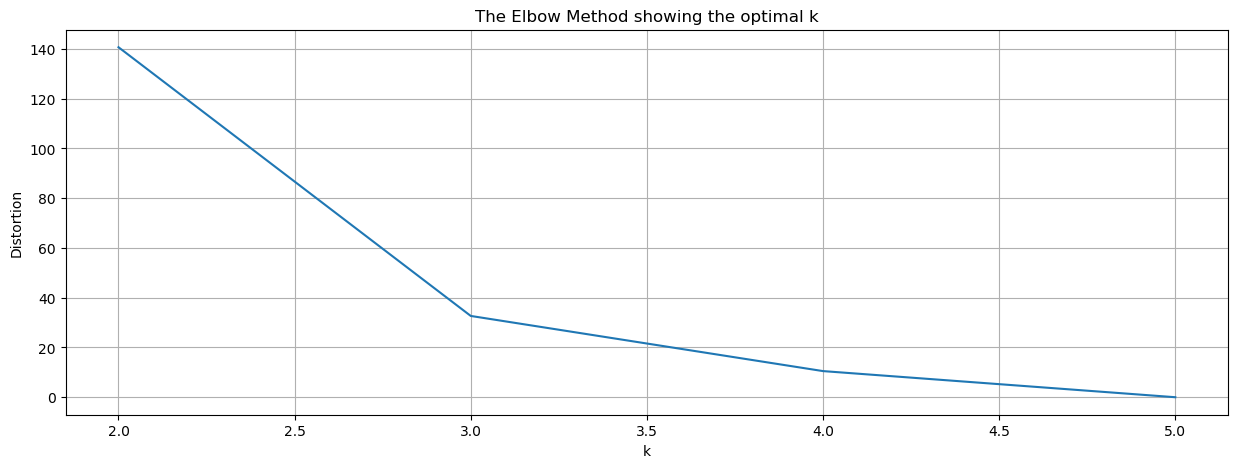

In [70]:
# clustering dataset
# determine k using elbow method
   
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

X = leuven_grouped_II.drop('Neighborhood', 1) # <your_data>
distorsions = []
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 6), distorsions)
plt.grid(True)
#plt.title('Elbow curve')   
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

When K increases, the centroids are closer to the clusters centroids.
Here the distortion, mean sum of squared distances to centers, decreases to the optimum point.
The improvements will decline, at some point rapidly, creating the elbow shape.
That point is the optimal value for k. In the image above, k=3.
### We will input k=3 in the following calculations.

# Run k-means to Cluster Neighborhoods into 5 Clusters

In [71]:
# import k-means from clustering stage
from sklearn.cluster import KMeans


# set number of clusters
kclusters = 3

leuven_grouped_clustering = leuven_grouped_II.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(leuven_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_ 


array([1, 2, 1, 1, 0], dtype=int32)

In [72]:
leuven_grouped_clustering.insert(0,'Cluster Labels', kmeans.labels_)
group_clusters=leuven_grouped_clustering.groupby('Cluster Labels').mean()
#group_clusters
#group_clusters.index = ['CL1','CL2','CL3']
group_clusters['Total Customer Sum'] = group_clusters.sum(axis = 1)
group_clusters.sort_values(axis = 0, by = ['Total Customer Sum'], ascending=False)

,Coffee Shop,Mexican Restaurant,Friterie,Bakery,Hotel,Pizza Place,Cheese Shop,Italian Restaurant,Wine Bar,Indian Restaurant,Thai Restaurant,Bar,Burrito Place,Cocktail Bar,Bistro,Restaurant,Frozen Yogurt Shop,Ice Cream Shop,Burger Joint,Dessert Shop,Vegetarian / Vegan Restaurant,French Restaurant,Brasserie,Beer Bar,Sushi Restaurant,Poke Place,Soup Place,Sandwich Place,Tapas Restaurant,Gourmet Shop,Tea Room,Organic Grocery,Chocolate Shop,Chinese Restaurant,Gastropub,Noodle House,Pie Shop,BBQ Joint,Greek Restaurant,Steakhouse,Supermarket,Belgian Restaurant,College Cafeteria,Farmers Market,Fast Food Restaurant,Food Court,Brewery,Middle Eastern Restaurant,Sports Bar,Kebab Restaurant,Café,Market,Doner Restaurant,Convenience Store,Liquor Store,Club House,Fruit & Vegetable Store,Total Customer Sum
Cluster Labels,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,10.0,2.0,3.0,2.000000,1.000000,2.000000,1.0,7.000000,1.0,2.000000,1.000000,14.0,1.0,3.0,2.0,3.000000,1.0,2.0,1.0,1.0,2.0,1.0,1.000000,1.0,2.0,1.0,1.0,1.0,1.0,2.000000,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,81.000000
2,3.0,0.0,6.0,7.000000,4.000000,2.000000,0.0,2.000000,0.0,0.000000,1.000000,10.0,0.0,0.0,0.0,0.000000,0.0,1.0,1.0,0.0,0.0,2.0,2.000000,0.0,0.0,0.0,0.0,3.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,2.0,1.000000,0.000000,0.000000,0.000000,1.0,2.000000,1.0,1.0,1.000000,1.0,1.0,1.0,1.000000,0.000000,0.000000,0.000000,57.000000
1,0.0,0.0,1.0,1.333333,0.333333,0.333333,0.0,0.333333,0.0,0.333333,0.333333,2.0,0.0,0.0,0.0,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.0,0.0,0.0,0.0,1.0,0.0,0.333333,0.0,0.0,0.0,1.0,0.333333,0.0,0.0,0.0,0.333333,0.333333,2.0,0.666667,0.333333,0.333333,0.333333,0.0,0.333333,0.0,0.0,0.666667,0.0,0.0,0.0,0.333333,0.333333,0.333333,0.333333,16.666667


In [73]:
clustersTable=group_clusters.sort_values(axis = 0, by = ['Total Customer Sum'], ascending=False)
clustersTable.to_csv('clustersTable.csv')


In [74]:
clustersTable[0:]['Total Customer Sum']

Cluster Labels
0    81.000000
2    57.000000
1    16.666667
Name: Total Customer Sum, dtype: float64

In [114]:
clustersTable[0:]['Total Customer Sum'].values

array([81.        , 57.        , 16.66666667])

In [75]:
clustersTable.index.values

array([0, 2, 1])

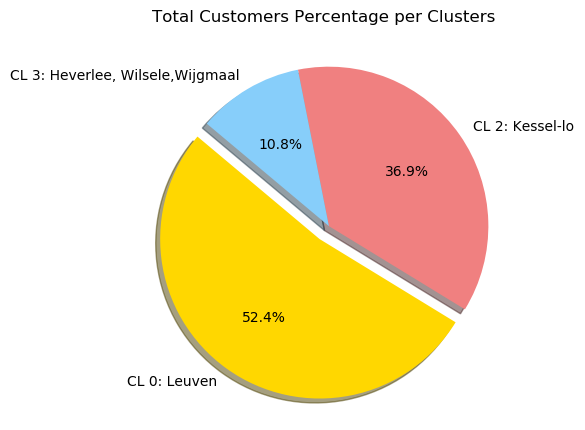

In [76]:
#pie chart showing the distribution of general venues in each neighbourhoods

sizes=clustersTable[0:]['Total Customer Sum'].values

# Data to plot
labelsH= 'CL 0: Leuven', 'CL 2: Kessel-lo', 'CL 3: Heverlee, Wilsele,Wijgmaal'
sizes=sizes
colors = ['gold', 'lightcoral', 'lightskyblue']
explode = (0.1,0,0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labelsH, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Total Customers Percentage per Clusters\n') 
plt.axis('equal')
plt.show()

## The Best cluster is Cluster 0 with Total Customer Sum 81.
The Cluster 2 is with score 75 and the last one is with 55 in total.
Lets find which neighborhoods have which values.

In [77]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
leuven_merged = LeuvenDF

# merge leuven_grouped with leuven_data to add latitude/longitude for each neighborhood
leuven_merged =leuven_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

leuven_merged.head() # check the last columns!

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,3000,Leuven,Leuven,50.881253,4.692990,0,Bar,Coffee Shop,Italian Restaurant,Restaurant,Cocktail Bar,Friterie,Vegetarian / Vegan Restaurant,Gourmet Shop,Bakery,Indian Restaurant
1,3001,Leuven,Heverlee,50.851729,4.693131,1,Bar,Chinese Restaurant,Bakery,Brasserie,Belgian Restaurant,Farmers Market,Gastropub,Restaurant,Greek Restaurant,Steakhouse
2,3010,Leuven,Kessel-Lo,50.889915,4.730761,2,Bar,Bakery,Friterie,Hotel,Coffee Shop,Sandwich Place,Brewery,Italian Restaurant,French Restaurant,Supermarket
3,3012,Leuven,Wilsele,50.909536,4.713629,1,Supermarket,Pizza Place,Sandwich Place,Club House,Gourmet Shop,Indian Restaurant,Brewery,Fruit & Vegetable Store,Kebab Restaurant,Liquor Store
4,3018,Leuven,Wijgmaal,50.926428,4.700121,1,Bar,Chinese Restaurant,Sandwich Place,Convenience Store,Friterie,Bakery,Supermarket,Kebab Restaurant,Restaurant,Fruit & Vegetable Store


In [84]:
import folium
# Finally, let's visualize the resulting clusters
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
rainbow=['#8000ff', '#80ffb4', '#ff0000']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(leuven_merged['Latitude'], leuven_merged['Longitude'], leuven_merged['Neighborhood'], leuven_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [ ]:
### RESULTS

So as we see that Leuven with cluster number 0 has 81 in total customer potential. Leuven City centrum is the best cluster (group).
Then ..

### Examine Clusters

### Best Neighborhood to build a Food warehouse : Cluster 0:  Leuven City Center

In [85]:
leuven_merged.loc[leuven_merged['Cluster Labels'] == 0, leuven_merged.columns[[2] + list(range(5, leuven_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Leuven,0,Bar,Coffee Shop,Italian Restaurant,Restaurant,Cocktail Bar,Friterie,Vegetarian / Vegan Restaurant,Gourmet Shop,Bakery,Indian Restaurant


### Second Best Neighborhood: ## Cluster 2: Kessel-Lo

In [86]:
leuven_merged.loc[leuven_merged['Cluster Labels'] == 2, leuven_merged.columns[[2] + list(range(5, leuven_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Kessel-Lo,2,Bar,Bakery,Friterie,Hotel,Coffee Shop,Sandwich Place,Brewery,Italian Restaurant,French Restaurant,Supermarket


### Third alternatif is among Cluster 1:  Heverlee, Wilsele, Wijgmaal

In [87]:
leuven_merged.loc[leuven_merged['Cluster Labels'] == 1, leuven_merged.columns[[2] + list(range(5, leuven_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Heverlee,1,Bar,Chinese Restaurant,Bakery,Brasserie,Belgian Restaurant,Farmers Market,Gastropub,Restaurant,Greek Restaurant,Steakhouse
3,Wilsele,1,Supermarket,Pizza Place,Sandwich Place,Club House,Gourmet Shop,Indian Restaurant,Brewery,Fruit & Vegetable Store,Kebab Restaurant,Liquor Store
4,Wijgmaal,1,Bar,Chinese Restaurant,Sandwich Place,Convenience Store,Friterie,Bakery,Supermarket,Kebab Restaurant,Restaurant,Fruit & Vegetable Store


In [88]:
#alternatief
import folium

In [89]:
# Leuven latitude and longitude values
latitude=50.881253
longitude=4.69299
#latitude= float(LeuvenDF[0:1]['Latitude'])
#longitude= float(LeuvenDF[0:1]['Longitude'])
map_leuven = folium.Map(location=[latitude, longitude], zoom_start=13)
map_leuven

In [96]:
# Pandas method: to get the postal code and neighborhood data

url="https://services1.arcgis.com/XLY7M6F9oPzjvKmJ/arcgis/rest/services/Leuven_Deelgemeenten/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson"
leuvengeo = requests.get(url).text
#this data is in Vlanderen.geojson
#print(VlanderenGeo)
#this data then preprocessed/cleaned into leuven.geojson file in text editor

In [ ]:
!conda install -c conda-forge geopandas

Solving environment: / 

In [ ]:
# to use in folium we need a convertion of json data which is EPSG:3857" to 4326
import geopandas as gpd
leuven_convert_json = gpd.read_file('leuven.geojson')
leuven_convert_json= leuven_convert_json.to_crs(epsg='4326')
leuvenJson = leuven_convert_json.to_json('leuvenMaster.json')
leuvenJson

In [ ]:
leuvenJson

In [97]:
#potential customers per neighborhood
df

,Neighborhood,Total Food Customers
0,Heverlee,24
1,Kessel-Lo,57
2,Wijgmaal,11
3,Wilsele,15
4,Leuven,81


In [118]:
#now we wiil have our choropleth
leuven_geo = r'leuven.geojson'

# create a numpy array of length 6
threshold_scale = np.linspace(df['Total Food Customers'].min(),
                              df['Total Food Customers'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration

# let Folium determine the scale.
#sanfran_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')
latitude=50.881253
longitude=4.69299
leuven_map2 = folium.Map(location=[latitude, longitude], zoom_start=12,crs='EPSG3857')

leuven_map2.choropleth(
    geo_data=leuven_geo,
    data=df,
    columns=['Neighborhood', 'Total Food Customers'],
    #key_on='feature.properties.DISTRICT',
    key_on='feature.properties.ADMUNADU',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Total Potential Food Customers in Leuven',
    reset=True
)
leuven_map2

In [26]:
#Vlanderen.geojson

I am using this JSON file: https://github.com/datalivre/Conjunto-de-Dados/blob/master/br_states.json Look at the code, it's a bit different from yours. You do not need to convert the JSON file to a dictionary. Here an image with the result that I got. folium br_states

### 5-CONCLUSION##
    
 <a href="#item8">Recommend Analytic Results</a>  

### Sharing valuable and useful info is a Win-Win Situation for the World 
#### Levent BINGOL - levobelgium@gmail.com